In [1]:
import os
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
emoji_classes = [
    "😀", "😂", "😢", "😭", "😡", "🤬", "😱", "😮", "😎", "🤓",
    "🤠", "😇", "😈", "🤖", "🤯", "🤢", "🤮", "🥵", "🥶", "😴"
]

num_classes = len(emoji_classes)
img_size = 64


In [3]:
def emoji_to_codepoint(e):
    return "-".join(f"{ord(c):x}" for c in e)


In [4]:
TWEMOJI_BASE = "https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/"
SAVE_DIR = "twemoji_png"
os.makedirs(SAVE_DIR, exist_ok=True)

def download_emoji_png(emoji):
    code = emoji_to_codepoint(emoji)
    url = f"{TWEMOJI_BASE}{code}.png"
    save_path = os.path.join(SAVE_DIR, f"{code}.png")

    if not os.path.exists(save_path):
        print("Downloading:", emoji, url)
        r = requests.get(url)
        with open(save_path, "wb") as f:
            f.write(r.content)
    
    return save_path

emoji_png_paths = {emoji: download_emoji_png(emoji) for emoji in emoji_classes}


Downloading: 😀 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f600.png
Downloading: 😂 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f602.png
Downloading: 😢 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f622.png
Downloading: 😭 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f62d.png
Downloading: 😡 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f621.png
Downloading: 🤬 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f92c.png
Downloading: 😱 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f631.png
Downloading: 😮 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f62e.png
Downloading: 😎 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f60e.png
Downloading: 🤓 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f913.png
Downloading: 🤠 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/1f920.png
Downloading: 😇 https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.

In [5]:
def generate_color_emoji_image(emoji):
    bg_color = tuple(np.random.randint(0,255,size=3))
    img = Image.new("RGB", (img_size, img_size), bg_color)

    emoji_img = Image.open(emoji_png_paths[emoji]).convert("RGBA")
    emoji_img = emoji_img.resize((50, 50), Image.LANCZOS)

    pos = ((img_size - emoji_img.width)//2,
           (img_size - emoji_img.height)//2)

    img.paste(emoji_img, pos, emoji_img)

    return np.array(img)


In [6]:
images_per_class = 200
dataset_images = []
dataset_labels = []

print("Generating dataset...")

for label, emoji in enumerate(emoji_classes):
    print(f"Class {label}: {emoji}")
    for _ in range(images_per_class):
        img = generate_color_emoji_image(emoji)
        dataset_images.append(img)
        dataset_labels.append(label)

dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)

print("Dataset complete!")
print("Images:", dataset_images.shape)
print("Labels:", dataset_labels.shape)


Generating dataset...
Class 0: 😀
Class 1: 😂
Class 2: 😢
Class 3: 😭
Class 4: 😡
Class 5: 🤬
Class 6: 😱
Class 7: 😮
Class 8: 😎
Class 9: 🤓
Class 10: 🤠
Class 11: 😇
Class 12: 😈
Class 13: 🤖
Class 14: 🤯
Class 15: 🤢
Class 16: 🤮
Class 17: 🥵
Class 18: 🥶
Class 19: 😴
Dataset complete!
Images: (4000, 64, 64, 3)
Labels: (4000,)


C:\Users\kampm\AppData\Local\Temp\ipykernel_8652\3847621303.py:8: UserWarning: Glyph 129312 (\N{FACE WITH COWBOY HAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kampm\AppData\Local\Temp\ipykernel_8652\3847621303.py:8: UserWarning: Glyph 129326 (\N{FACE WITH OPEN MOUTH VOMITING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kampm\AppData\Local\Temp\ipykernel_8652\3847621303.py:8: UserWarning: Glyph 129327 (\N{SHOCKED FACE WITH EXPLODING HEAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kampm\AppData\Local\Temp\ipykernel_8652\3847621303.py:8: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kampm\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129312 (\N{FACE WITH COWBOY HAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kampm\anaconda3\envs\tf_env\lib\site-p

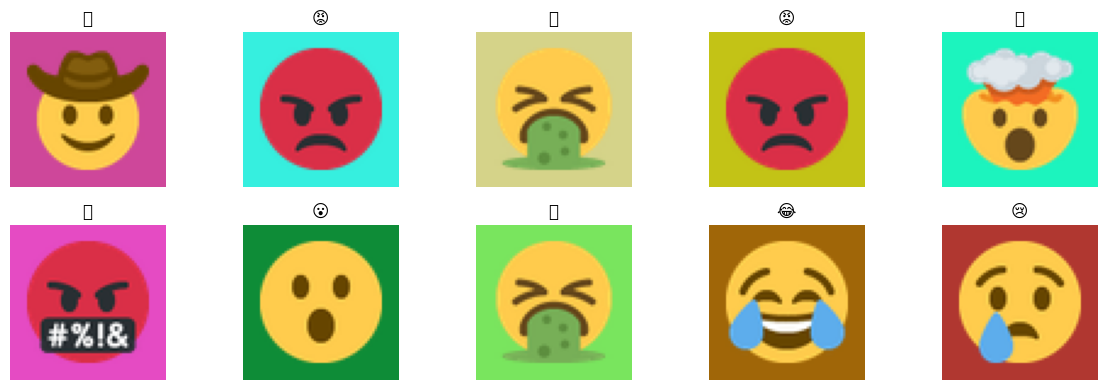

In [7]:
plt.figure(figsize=(12,4))
for i in range(10):
    idx = random.randint(0, len(dataset_images)-1)
    plt.subplot(2,5,i+1)
    plt.imshow(dataset_images[idx])
    plt.axis("off")
    plt.title(emoji_classes[dataset_labels[idx]])
plt.tight_layout()
plt.show()


In [8]:
images = dataset_images.astype("float32") / 255.0
labels_cat = to_categorical(dataset_labels, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(
    images, labels_cat, test_size=0.2,
    stratify=dataset_labels,
    random_state=42
)

X_train.shape, X_test.shape


((3200, 64, 64, 3), (800, 64, 64, 3))

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)             

In [10]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10


80/80 [==============================] - 7s 79ms/step - loss: 0.5855 - accuracy: 0.8434 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 2/10
80/80 [==============================] - 6s 74ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 3.7121e-04 - val_accuracy: 1.0000
Epoch 3/10
80/80 [==============================] - 6s 72ms/step - loss: 0.0054 - accuracy: 0.9996 - val_loss: 2.2986e-05 - val_accuracy: 1.0000
Epoch 4/10
80/80 [==============================] - 6s 76ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.0219e-05 - val_accuracy: 1.0000
Epoch 5/10
80/80 [==============================] - 6s 73ms/step - loss: 7.7133e-04 - accuracy: 1.0000 - val_loss: 1.2909e-05 - val_accuracy: 1.0000
Epoch 6/10
80/80 [==============================] - 6s 71ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 1.0315e-04 - val_accuracy: 1.0000
Epoch 7/10
80/80 [==============================] - 6s 70ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 3.3425e-05 - val_

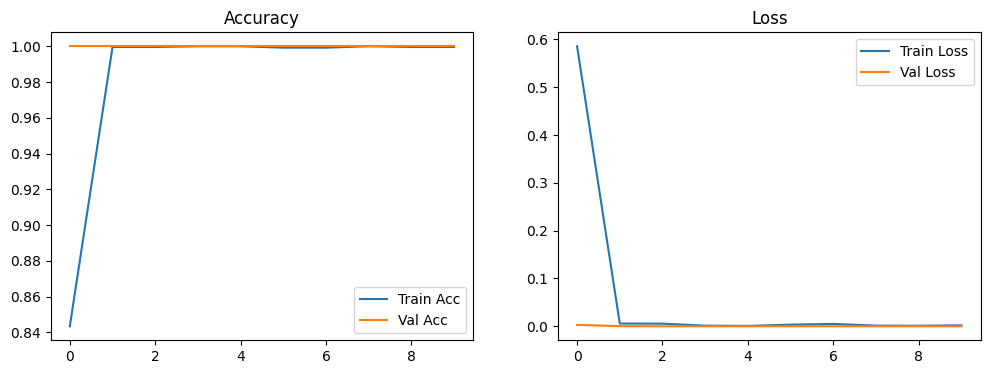

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


25/25 [==============================] - 0s 16ms/step - loss: 9.3042e-07 - accuracy: 1.0000
Test Accuracy: 1.0


25/25 [==============================] - 1s 16ms/step


C:\Users\kampm\anaconda3\envs\tf_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\kampm\anaconda3\envs\tf_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\kampm\anaconda3\envs\tf_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129312 (\N{FACE WITH COWBOY HAT}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\kampm\anaconda3\envs\tf_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\kampm\anaconda3\envs\tf_env\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129327 (\N{SHOCKED FACE WITH EXPLODING HEAD}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\kampm\anaconda3\envs\tf_env\lib\site-packages\seaborn\utils.py:61

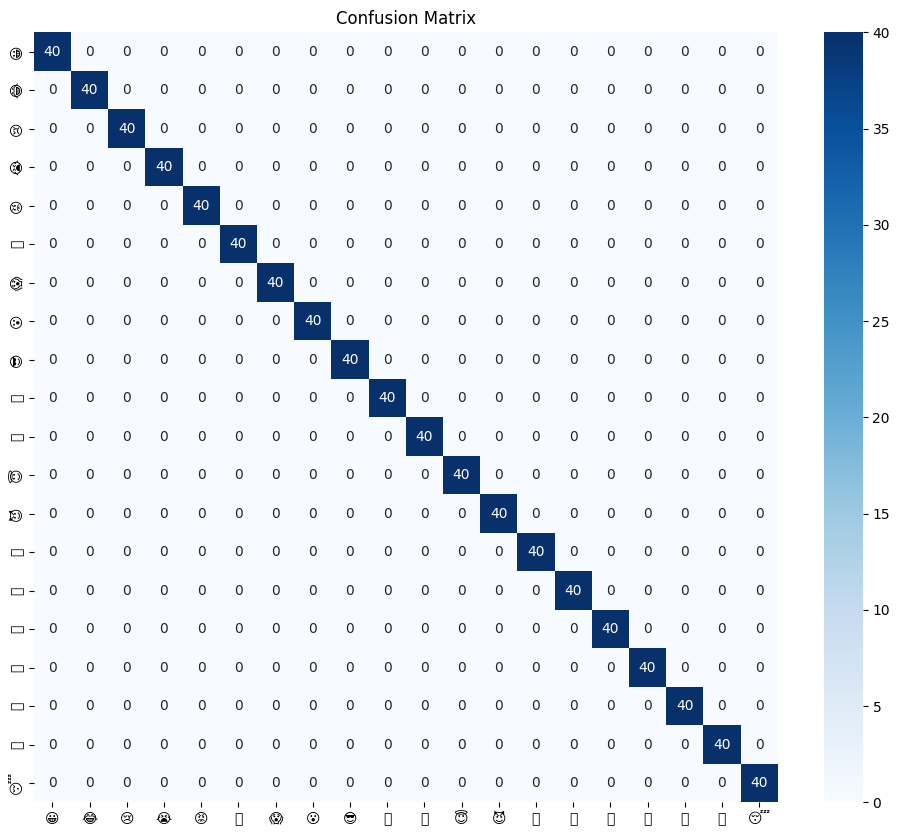

In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=emoji_classes,
            yticklabels=emoji_classes,
            cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
